# Classification using SVM and Logistic Affine Classifiers

We consider the supervised learning problem where the goal is to classify feature vectors $x \in \mathbb{R}^n$ into one of $K$ classes. Here we will consider the multi-class setting where $K$ is possibly larger than $2$, and we let $\mathcal{Y} = \{0,1,\dots, K-1\}$ denote the set of classes. (Starting the indexing at 0 is convenient for implementation, since it readily corresponds to indexing into an array.)

## Multi-class SVM Classifier

Here we extend our (soft margin) SVM approach to the multi-class setting.

**Loss function:**
Our affine classifier gives us class scores $Wx+b$ for each feature vector $x$, and the class that we predict for $x$ is the class with largest score. Our task is to write down a (regularized) loss objective that encourages the classifier to predict the correct label, i.e., we aim to encourage the classifier to give a larger score to the correct label. To this end, let us pick a constant scalar value $\Delta \geq 0$ and aim that the score of the correct class is at least $\Delta$ larger than the score of each of the other classes. We can make this precise by assinging to each example $\left(x^{(i)}, y^{(i)} \right)$ a loss $L_i$ that is equal to
    $$L_i = \sum_{c \neq y^{(i)}}\max \Big\{0, \underbrace{(Wx^{(i)}+b)_{c}}_{\text{score of class } c \neq y^{(i)}} - \underbrace{(Wx^{(i)}+b)_{y^{(i)}}}_{\text{score of correct class } y^{(i)}} + \Delta \Big\}$$
Let us parse the above: We consider each class $c$ other than the correct class $y^{(i)}$ in turn. If the score of the correct label is at least $\Delta$ larger than the score of $c$, we get a contribution of $0$ to the loss $L_i$ (since the second term in the max is $\leq 0$, and we take the max of it with $0$). Otherwise, we penalize the classifier by increasing $L_i$ by a positive amount (which is equal to (score of $c$) - (score of correct class) + $\Delta$).

We obtain an overall regularized loss objective by taking the average of the losses over our dataset $\mathcal{D} = \{\left(x^{(i)}, y^{(i)} \right) \colon 1 \leq i \leq m\}$ and adding a regularizer. We use the $\ell_2^2$ norm of the weights as the regularizer, i.e., $R(W) = \sum_{i, j} W_{ij}^2 = \|W\|_F^2$ (recall from lecture that $\|A\|_F$ is the Frobenious norm of matrix $A$). Thus we obtain the following regularized loss function:
    $$f_{\mathrm{svm}}(W,b) = \frac{1}{m} \sum_{i=1}^m \sum_{c \neq y^{(i)}}\max \Big\{0, (Wx^{(i)}+b)_{c} - (Wx^{(i)}+b)_{y^{(i)}} + \Delta \Big\} + \gamma \cdot \|W\|_F^2 $$
where $\gamma \geq 0$ is a constant that we choose, as before.

**Constants $\Delta$, $\gamma$:** Note that we now have two constants that we choose (these are called hyperparameters): $\Delta \geq 0$ and $\gamma \geq 0$. We can set these by trial and error ($\Delta = 1$ is a good choice).

**Train the model:** To obtain a classifier, all that remains is to find parameters that minimize the loss $f_{\mathrm{svm}}(W,b)$. We will do so via **(sub)gradient descent**.


## SVM Math Portion: Compute subgradients
We want to find a subgradient with respect to $W$ and $b$, respectively. 

$$f_{\mathrm{svm}}(W,b) = \frac{1}{m} \sum_{i=1}^m \sum_{c \neq y^{(i)}}\max \Big\{0, (Wx^{(i)}+b)_{c} - (Wx^{(i)}+b)_{y^{(i)}} + \Delta \Big\} + \gamma \cdot \|W\|_F^2 $$
Subgradient for the weight matrix \( W \):


$$
\nabla_W f_{\text{svm}}(W, b) = \frac{1}{m} \sum_{i=1}^m \left( \sum_{c \neq y^{(i)}} x^{(i)} \mathbb{1}\{(Wx^{(i)} + b)_c - (Wx^{(i)} + b)_{y^{(i)}} + \Delta > 0\} - x^{(i)} \mathbb{1}\{(Wx^{(i)} + b)_{y^{(i)}} - (Wx^{(i)} + b)_c + \Delta > 0\} \right) + 2 \gamma W
$$

In the inner sum the added $x^i$ is to the $c^{th}$ row of \( W \) and the subtracted $x^i$ is to the $y^{i^{th}}$ row of \( W \).


Subgradient for the bias \( b \):

$$
\nabla_b f_{\text{svm}}(W, b) = \frac{1}{m} \sum_{i=1}^m \sum_{c \neq y^{(i)}} \mathbb{1}\left\{ (Wx^{(i)} + b)_c - (Wx^{(i)} + b)_{y^{(i)}} + \Delta > 0 \right\} - \mathbb{1}\left\{ (Wx^{(i)} + b)_c - (Wx^{(i)} + b)_{y^{(i)}} + \Delta > 0 \right\}
$$

Additon to the $c^{th}$ element and subtraction to the $y^{i^{th}}$ element.

Subgradient for the weight matrix \( W \):





## SVM Programming Portion: Train the SVM model

In [2]:
# Imports and setup
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_moons
import numpy as np
import random

# Fix the random seed (for reproducibility)
random.seed(123)
np.random.seed(123)

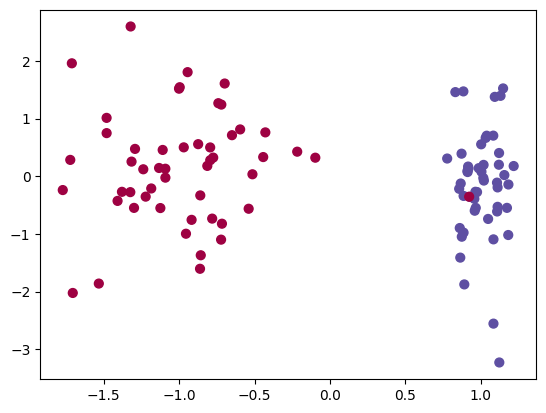

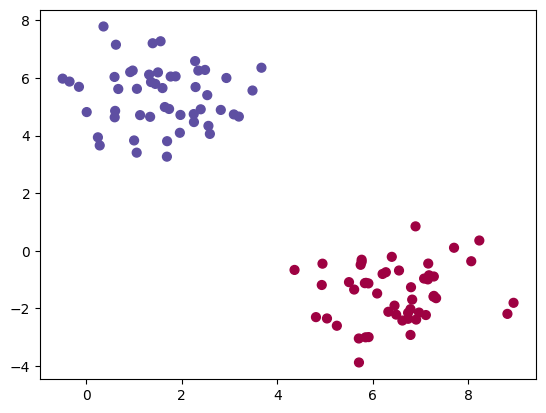

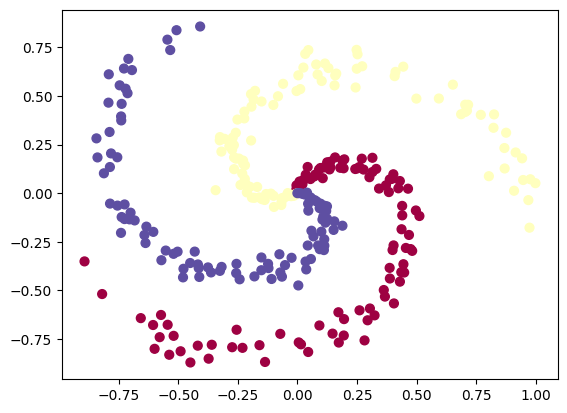

In [3]:
# Setting up the 2D datasets (already implemented for you)

# plot the feature vectors as points in the plane, colored according to the class
def plot_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

# random binary classification
def dataset_binary(num_examples = 100):
    X, y = make_classification(n_samples = num_examples, n_features=2, n_redundant=0,
                               n_informative=1, n_clusters_per_class=1)
    return X, y

# blobs
def dataset_blobs(num_examples = 100, num_classes = 2, num_centers = 2):
    X, y = make_blobs(n_samples = num_examples, n_features=num_classes, centers=num_centers)
    return X,y

# moons
def dataset_moons(num_examples = 100):
    X, y = make_moons(n_samples = num_examples)
    return X, y

# spirals
def dataset_spirals(num_classes = 3, num_examples_per_class = 100):
    """
    Code credit: Andrej Karpathy
    """
    N = num_examples_per_class # number of points per class
    D = 2 # dimensionality
    K = num_classes # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels

    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
        
    return X, y
    

# example datasets
X, y = dataset_binary()
plot_dataset(X, y)

X, y = dataset_blobs()
plot_dataset(X, y)

X, y = dataset_spirals()
plot_dataset(X, y)

In [4]:
def predict_classes(X, W, b):
    """
    Use the affine classifier (W, b) to predict labels for the feature vectors in X.

    Inputs:
    - X: A numpy array of shape (m, n) containing the feature vectors 
         (row i of X is the feature vector of the i-th training example).
    - W: A numpy array of shape (K, n) containing weights.
    - b: A numpy array of shape (K,) containing offsets.

    Returns:
    - y_pred: A numpy array of shape (m,) containing the predicted labels for the feature vectors in X.
    """
    
    scores = X @ W.T + b
    y_pred = np.argmax(scores, axis=1)
    return y_pred

def evaluate_accuracy(X, y, W, b):
    """
    Evaluate the accuracy of an affine classifier (W, b) on the feature vectors in X.

    Inputs:
    - X: A numpy array of shape (m, n) containing the feature vectors 
         (row i of X is the feature vector of the i-th training example).
    - y: A numpy array of shape (m,) containing the training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < K.
    - W: A numpy array of shape (K, n) containing weights.
    - b: A numpy array of shape (K,) containing offsets.

    Returns:
    - accuracy: The accuracy of the classifier on the feature vectors in X.
    """
    y_pred = predict_classes(X, W, b)
    accuracy = np.mean(y_pred == y)
    return accuracy
    
def plot_classifier(X, y, W, b):
    """
    Code credit: Andrej Karpathy
    """
    
    """
    Code to visualize the classifier on feature vectors in R^2.

    Inputs:
    - X: A numpy array of shape (m, n) containing the feature vectors 
         (row i of X is the feature vector of the i-th training example).
    - y: A numpy array of shape (m,) containing the training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < K.
    - W: A numpy array of shape (K, n) containing weights.
    - b: A numpy array of shape (K,) containing offsets.
    """
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W.T) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [35]:
def svm_loss_grad(X, y, W, b, reg, delta):
    """
    Compute the loss and gradients of the SVM loss.
    Feature vectors have dimension n, there are K classes, and m training examples.

    Inputs:
    - X: A numpy array of shape (m, n) containing the training feature vectors 
        (row i of X is the feature vector of the i-th training example).
    - y: A numpy array of shape (m,) containing the training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < K.
    - W: A numpy array of shape (K, n) containing weights.
    - b: A numpy array of shape (K,) containing offsets.
    - reg: (float) the regularization constant gamma.
    - delta: (float) the Delta in the SVM loss.

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    - gradient with respect to the offsets b; an array of the same shape as b
    """
    loss = 0.0
    num_classes = W.shape[0]
    num_train = X.shape[0]

    #calculating the loss
    scores = X @ W.T + b
    correct_class_scores = scores[np.arange(num_train), y]
    margins = np.maximum(0, scores - correct_class_scores[:, np.newaxis] + delta)
    margins[np.arange(num_train), y] = 0
    loss = np.sum(margins) / num_train + reg * np.sum(W * W)


    #calculating gradient for W
    binary = np.zeros((num_train, num_classes))
    binary[margins > 0] = 1
    row_sum = np.sum(binary, axis=1)
    binary[np.arange(num_train), y] = -row_sum[np.arange(num_train)]
    dW = binary.T @ X / num_train + 2 * reg * W

     #calculating gradient for b
    class_violations = np.sum(binary, axis=0)
    db = class_violations - np.bincount(y, weights=row_sum, minlength=num_classes)
    db /= num_train

    

    return loss, dW, db

def svm_train(X, y, reg=1e-3, delta=1, step_size=1e-0, num_iters=100, verbose=True):
    """
    Train an SVM classifier using  gradient descent.

    Inputs:
    - X: A numpy array of shape (m, n) containing the training feature vectors 
         (row i of X is the feature vector of the i-th training example).
    - y: A numpy array of shape (m,) containing the training labels; y[i] = c means
         that X[i] has label c, where 0 <= c < K.
    - step_size: (float) gradient descent step size.
    - reg: (float) regularization constant gamma.
    - delta: (float) the delta in the SVM loss
    - num_iters: (integer) number of gradient descent iterations.
    - verbose: (boolean) If true, print progress during optimization.

    Outputs:
     - W : matrix of weights
     - b : vector of offsets
     - loss_history: a list containing the value of the loss function at each training iteration.
    """
    
    num_examples, n = X.shape
    num_classes = np.max(y) + 1 # y takes values 0...K-1 where K is number of classes
    # initialize W and b
    W = 0.001 * np.random.randn(num_classes, n)
    b = np.zeros(num_classes)
    loss_history = []

    #gradient descent
    for i in range(num_iters):
        loss, dW, db = svm_loss_grad(X, y, W, b, reg, delta)
        loss_history.append(loss)
        W -= step_size * dW
        b -= step_size * db

        if verbose and i % 100 == 0:
            print('iteration %d / %d: loss %f' % (i, num_iters, loss))

    return W, b, loss_history

0.5433333333333333

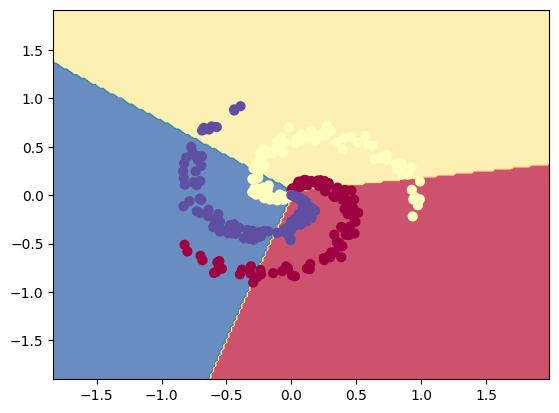

In [91]:
# test SVM

# TODO: use the function plot_classifier provided above to visualize classifiers
#   for dataset_binary, dataset_blobs, dataset_blobs, and dataset_spirals 
X, y = dataset_spirals()
W, b, loss_history = svm_train(X, y, reg=1e-3, delta=1, step_size=.5, num_iters=100000, verbose=False)
plot_classifier(X, y, W, b)
evaluate_accuracy(X, y, W, b)





1.0

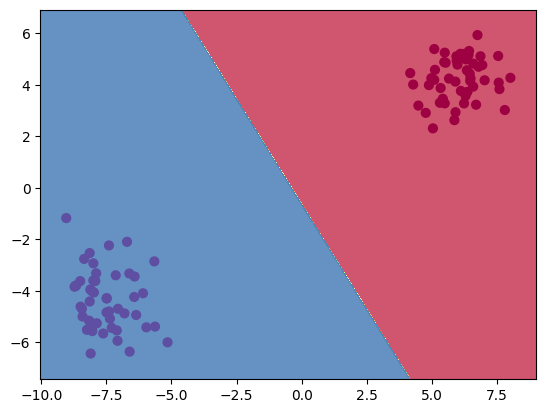

In [42]:
X, y = dataset_blobs()
W, b, loss_history = svm_train(X, y, reg=1e-3, delta=1, step_size=.5, num_iters=1000000, verbose=False)
plot_classifier(X, y, W, b)
evaluate_accuracy(X, y, W, b)

0.88

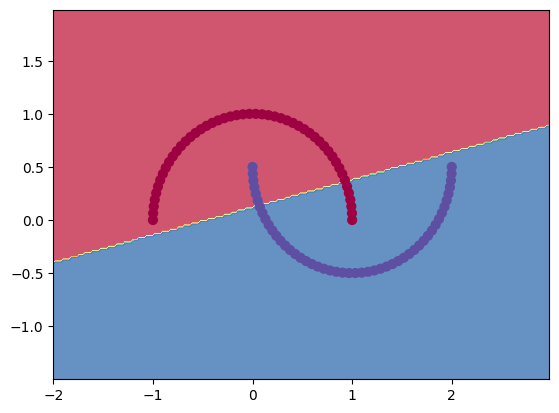

In [43]:
X,y = dataset_moons()
W, b, loss_history = svm_train(X, y, reg=1e-3, delta=1, step_size=.5, num_iters=1000000, verbose=False)
plot_classifier(X, y, W, b)
evaluate_accuracy(X, y, W, b)

1.0

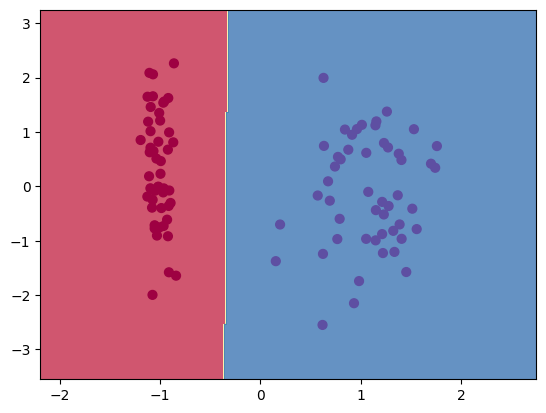

In [44]:
X, y = dataset_binary()
W, b, loss_history = svm_train(X, y, reg=1e-3, delta=1, step_size=.5, num_iters=1000000, verbose=False)
plot_classifier(X, y, W, b)
evaluate_accuracy(X, y, W, b)

## Multiclass logistic classifier

We will now use (multi-class) lostictic classification. Recall that in **binary** linear classification with a logistic loss, we mapped the score to a value in $[0,1]$ via the exponential function, which could thus be interpreted as the probability of the example belonging to class $1$. We can extend this idea to multiple classes with a smooth version of the maximum, the softmax function: Given an example $x$, the softmax function maps a vector of class scores $W x + b \in \mathbb R^K$ to a discrete probability distribution $\mathrm{softmax}(W x + b) \in \mathbb{R}^K$ over classes, where the entry for class $c$ is defined as
$$
\mathrm{softmax}(Wx + b)_c = \frac{\exp((Wx + b)_c)}{\sum_{c'} \exp((Wx + b)_{c'})} .
$$
Clearly, the softmax assigns maximum probability to the class with maximum score, and all probabilities add up to 1. The softmax has the immediate benefit that gradients do not vanish when a class is classified correctly as in the soft-margin SVM. As a loss, we use the cross-entropy loss, which is simply a multi-class extension of the logistic loss. For an example $(x, y)$, we define it as follows:
$$
L_i = - \log (\mathrm{softmax} (Wx + b)_{y}) .
$$
Note that with the logistic loss, we penalize a classifier whose probability score $\mathrm{softmax}(Wx + b)_y$ on the correct class label $y$ is low.
As for the SVM, we obtain the overall loss by taking the average of the cross-entropy losses and adding a regularizer:
$$
f_{\log}(W, b) = - \frac{1}{m} \sum_{i=1}^m \log \left(\mathrm{softmax} (Wx^{(i)} + b)_{y^{(i)}} \right) + \gamma \|W\|_F^2
$$

## Logistic Classification Math Portion: Compute subgradients
We will compute the gradient of the (multi-class) logistic loss $f_{\log}(W, b)$. As before, we want to find a subgradient with respect to $W$ and $b$, respectively. 

1. **Softmax Cross-Entropy Gradient**:

The derivative of $L_i $ with respect to the weights associated with the correct class $ y^{(i)} $ is:

$$
\frac{\partial L_i}{\partial W_{y^{(i)}}} = -(1 - \text{softmax}(Wx^{(i)} + b)_{y^{(i)}})x^{(i)}
$$

For all other classes $ c \neq y^{(i)} $, the derivative is:
$$
\frac{\partial L_i}{\partial W_c} = \text{softmax}(Wx^{(i)} + b)_c x^{(i)}
$$

Summing over all data and taking the average gives us the gradient of the cross-entropy term:

$$
\nabla_W L = -\frac{1}{m} \sum_{i=1}^m x^{(i)} (\text{one\_hot}(y^{(i)}) - \text{softmax}(Wx^{(i)} + b))^T
$$

2. **Regularization Gradient**:

The regularization term is:

$$
R(W) = \gamma \|W\|_F^2
$$

The derivative of the regularization term with respect to $ W $ is:

$$
\nabla_W R(W) = 2\gamma W
$$

3. **Total Gradient**:

Combining the gradients from the softmax cross-entropy term and the regularization term, we obtain the gradient:

$$
\nabla_W f_{\log}(W, b) = \nabla_W L + \nabla_W R(W) = -\frac{1}{m} \sum_{i=1}^m x^{(i)} (\text{one\_hot}(y^{(i)}) - \text{softmax}(Wx^{(i)} + b))^T + 2\gamma W
$$

The gradient for the bias term $ b $:

$$
\nabla_b f_{\log}(W, b) = -\frac{1}{m} \sum_{i=1}^m (\text{one\_hot}(y^{(i)}) - \text{softmax}(Wx^{(i)} + b))
$$


## Logistic Classification Programming Portion: Train the model

In [81]:
# Train a Softmax Classifier

def logistic_loss_grad(X, y, W, b, reg=1e-3):
    """
    Compute the loss and gradients of the logistic loss.
    Feature vectors have dimension n, there are K classes, and m training examples.

    Inputs:
    - W: A numpy array of shape (K, n) containing weights.
    - X: A numpy array of shape (m, n) containing the training feature vectors 
        (row i of X is the feature vector of the i-th training example).
    - y: A numpy array of shape (m,) containing the training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < K.
    - reg: (float) regularization constant gamma.

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    - gradient with respect to the offsets b; an array of the same shape as b
    """

    num_train = X.shape[0]
     # Computing the softmax probabilities
    scores = X.dot(W.T) + b
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))  # Numerical stability
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Computing the loss
    correct_logprobs = -np.log(probs[np.arange(num_train), y])
    data_loss = np.sum(correct_logprobs) / num_train
    reg_loss = reg * np.sum(W * W)
    loss = data_loss + reg_loss

    # Computing the gradient on scores
    dscores = probs
    dscores[np.arange(num_train), y] -= 1
    dscores /= num_train

    # Backpropagate the gradient to the weights and biases
    dW = dscores.T.dot(X)
    db = np.sum(dscores, axis=0)

    # Regularization gradient
    dW += 2 * reg * W


    return loss, dW, db








def logistic_train(X, y, step_size=1e-0, reg=1e-3, num_iters=200, verbose=True):
    """
    Train an logistic classifier using  gradient descent.

    Inputs:
    - X: A numpy array of shape (m, n) containing the training feature vectors 
         (row i of X is the feature vector of the i-th training example).
    - y: A numpy array of shape (m,) containing the training labels; y[i] = c means
         that X[i] has label c, where 0 <= c < K.
    - step_size: (float) gradient descent step size.
    - reg: (float) regularization constant gamma.
    - num_iters: (integer) number of gradient descent iterations.
    - verbose: (boolean) If true, print progress during optimization.

    Outputs:
     - W : matrix of weights
     - b : vector of offsets
     - loss_history: a list containing the value of the loss function at each training iteration.
     """

    num_examples, n = X.shape
    num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
    
    # initialize parameters randomly
    W = 0.01 * np.random.randn(num_classes, n)
    b = np.zeros(num_classes)
    loss_history = []
    
    for i in range(num_iters):
        loss, dW, db = logistic_loss_grad(X, y, W, b, reg)
        loss_history.append(loss)
        W -= step_size * dW
        b -= step_size * db
        
        if verbose and i % 100 == 0:
            print('iteration %d / %d: loss %f' % (i, num_iters, loss))

    return W, b, loss_history

0.5266666666666666

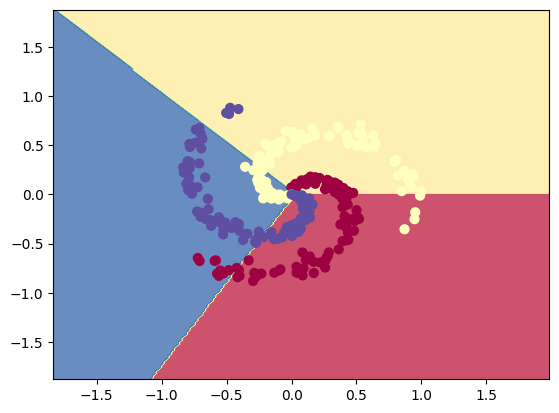

In [82]:
# test logistic regression
X, y = dataset_spirals()
W, b, loss_history = logistic_train(X, y, reg=1e-3, step_size=.5, num_iters=1000000, verbose=False)
plot_classifier(X, y, W, b)
evaluate_accuracy(X, y, W, b)

1.0

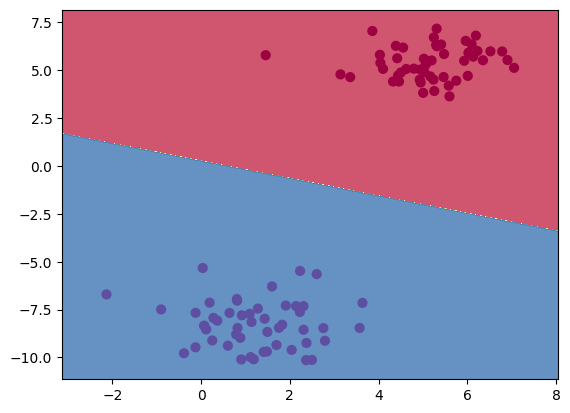

In [83]:
X, y = dataset_blobs()
W, b, loss_history = svm_train(X, y, reg=1e-3, delta=1, step_size=.5, num_iters=1000000, verbose=False)
plot_classifier(X, y, W, b)
evaluate_accuracy(X, y, W, b)

0.88

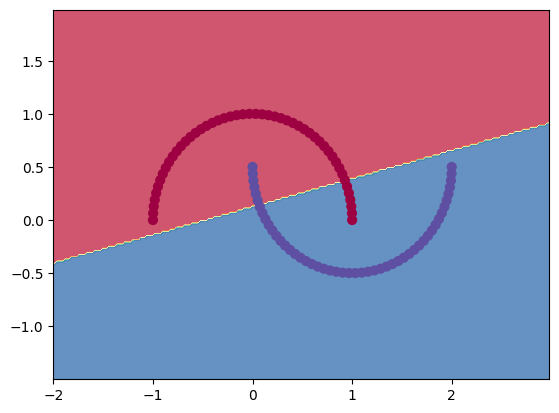

In [86]:
X,y = dataset_moons()
W, b, loss_history = svm_train(X, y, reg=1e-3, delta=1, step_size=.5, num_iters=1000000, verbose=False)
plot_classifier(X, y, W, b)
evaluate_accuracy(X, y, W, b)

0.97

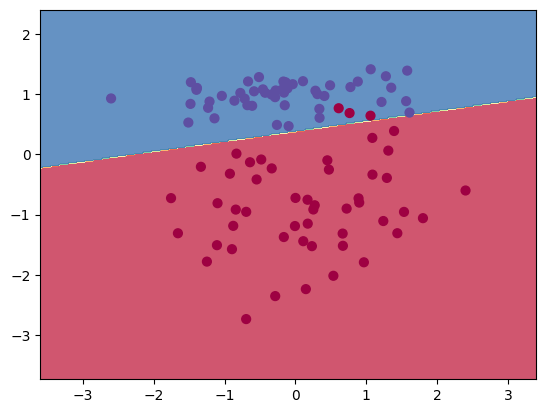

In [87]:
X, y = dataset_binary()
W, b, loss_history = svm_train(X, y, reg=1e-3, delta=1, step_size=.5, num_iters=1000000, verbose=False)
plot_classifier(X, y, W, b)
evaluate_accuracy(X, y, W, b)